# Importing Python libraries

In [1]:
import numpy as np  # library for numeric calculations   
import pandas as pd # library for reading data 
import seaborn as sns # library for plots 
from matplotlib import cm # library fo plots 
import matplotlib.pyplot as plt # library for plots 
from datetime import datetime # library to get the current time 
import datetime # library for time 
from sklearn.metrics import mean_squared_error # library for evaluation  mse 
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt  # library for evaluation  rmse
from sklearn.metrics import mean_absolute_error # library for evaluation mae 
from prettytable import PrettyTable # library for for comparison in tables 
from plotly.subplots import make_subplots # library for plots 
import plotly.graph_objs as go # library for plots 
from sklearn.linear_model import LinearRegression # library for linear regression model training 
import xgboost # library for xgboost model training 
from sklearn.ensemble import RandomForestRegressor # library for random forest model training 
from sklearn import linear_model # library for ridge model training 
from sklearn.neural_network import MLPRegressor # library for Mlp model training 
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.svm import SVR # library for SVR model training 
from sklearn.neighbors import KNeighborsRegressor # library for KNN model training 
from statsmodels.tsa.statespace.sarimax import SARIMAX # library for Sarima model training 
from keras.models import Model # library for for LSTM model 
from keras.layers import LSTM, Activation, Input, Embedding # library for LSTM
from keras.layers import Activation # library for RNN 
from keras.models import Sequential # library for RNN 
from keras.layers import Dense, Conv1D, Flatten, Dropout # library for LSTM
import datetime as dt #library for dates 
from binance import Client #library for getting python binance data
from binance import *
from sklearn.model_selection import RandomizedSearchCV #library for seraching best parametr
from keras.wrappers.scikit_learn import KerasClassifier #library for neural network model
from sklearn.model_selection import GridSearchCV #library for searching best parameter
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer  
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer 
import re 
import string
from collections import Counter 
from sklearn import preprocessing
from matplotlib import rcParams
from sklearn.feature_extraction.text import TfidfVectorizer
import tweepy as tw 

from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import spacy
from keras.preprocessing.text import Tokenizer
import matplotlib.cm as cm
from matplotlib import rcParams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import warnings # library to avoid system erros 
warnings.filterwarnings("ignore")  # library to avoid system erros 

C:\Users\callu\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\callu\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# ------------------------------------------------------------------------------------------------------

## Settings

In [2]:
cryptoTicker = "ETH"
cryptoPair = "USDT"

trainTestSplit = 0.8

# ------------------------------------------------------------------------------------------------------

### Loading dataset price data

In [3]:
api_key = '//' 
api_secret = '//'
client = Client(api_key, api_secret)
klines = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_4HOUR, "2021-01-01", "2022-01-01")
data = pd.DataFrame(klines)
data.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.close_time]
data=data[['close']]
data.head()
data = data.iloc[:-1 , :]

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [4]:
data.head() # showing the first 5 rows of data

,close
2021-01-01 03:59:59.999,744.82000000
2021-01-01 07:59:59.999,737.38000000
2021-01-01 11:59:59.999,738.85000000
2021-01-01 15:59:59.999,735.39000000
2021-01-01 19:59:59.999,725.34000000


### Five last records of data

In [5]:
data.tail() # showing the last 5 rows of data

,close
2021-12-31 07:59:59.999,3721.88000000
2021-12-31 11:59:59.999,3780.92000000
2021-12-31 15:59:59.999,3784.64000000
2021-12-31 19:59:59.999,3626.27000000
2021-12-31 23:59:59.999,3676.23000000


### Coloumns/features in data

In [6]:
data.columns #columns in data

Index(['close'], dtype='object')

### Length of data

In [7]:
print('lenght of data is', len(data)) #lenght of data

lenght of data is 2190


### Counts of missing values in each column

In [8]:
data.isnull().sum() #checking the null values columns wise 

close    0
dtype: int64

In [9]:
#priceData['open']=priceData['open'].astype(float)
#priceData['high']=priceData['high'].astype(float)
#priceData['low']=priceData['low'].astype(float)
data['close']=data['close'].astype(float)

### Spliting date into day, month and year

In [10]:
data['date'] = data.index # taking dates in date column 
data.sort_index(ascending=True, inplace=True)
data['Month'] = data['date'].dt.month # extracting months from data
data['Day'] = data['date'].dt.day # extracting day from data
data['Year'] = data['date'].dt.year # extracting year from data
data['Hour'] = data['date'].dt.hour # extracting year from data
data['Minutes'] = data['date'].dt.minute # extracting year from data

In [11]:
data.head()

,close,date,Month,Day,Year,Hour,Minutes
2021-01-01 03:59:59.999,744.82,2021-01-01 03:59:59.999,1,1,2021,3,59
2021-01-01 07:59:59.999,737.38,2021-01-01 07:59:59.999,1,1,2021,7,59
2021-01-01 11:59:59.999,738.85,2021-01-01 11:59:59.999,1,1,2021,11,59
2021-01-01 15:59:59.999,735.39,2021-01-01 15:59:59.999,1,1,2021,15,59
2021-01-01 19:59:59.999,725.34,2021-01-01 19:59:59.999,1,1,2021,19,59


### Close price with respect to year 

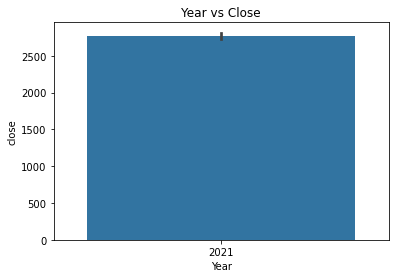

In [12]:
sns.barplot(x='Year', y='close', data=data).set(title='Year vs Close') # plotting the comparison of year and close price
plt.show() #showing the plot 

### Close price with respect to Month 

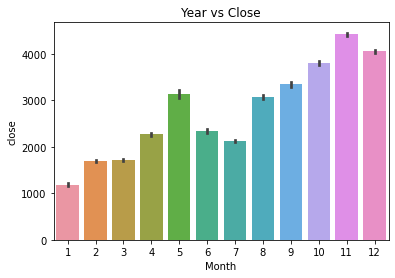

In [13]:
sns.barplot(x='Month', y='close', data=data).set(title='Year vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

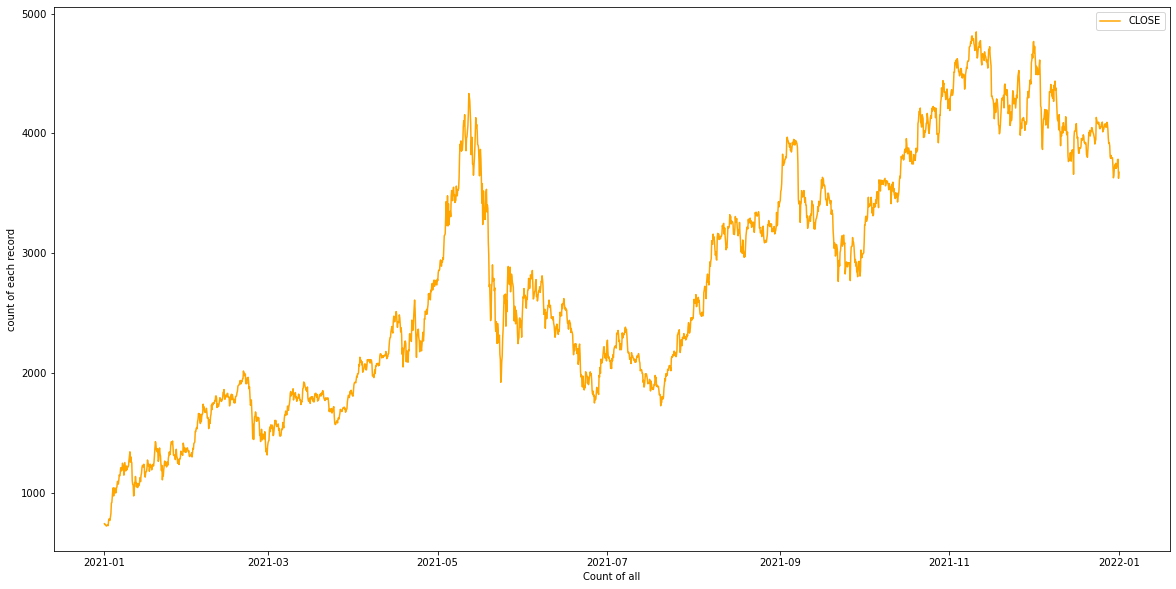

In [14]:
plt.figure(figsize=(20, 10)) #setting the width and height of the plot 
plt.subplot(1,1,1) #plot setting 
plt.plot(data.index, data['close'].values,color='orange',label='CLOSE') # plotting Close price 
plt.xlabel('Count of all') # x axis 
plt.ylabel('count of each record') # y axis 
plt.legend(loc='best') #legend name as Close 
plt.show() # showing the plot 

# ------------------------------------------------------------------------------------------------------

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [15]:
X=data.drop(columns=['close','date']) #dropping the 'Close','date'
X #input features 

,Month,Day,Year,Hour,Minutes
2021-01-01 03:59:59.999,1,1,2021,3,59
2021-01-01 07:59:59.999,1,1,2021,7,59
2021-01-01 11:59:59.999,1,1,2021,11,59
2021-01-01 15:59:59.999,1,1,2021,15,59
2021-01-01 19:59:59.999,1,1,2021,19,59
...,...,...,...,...,...
2021-12-31 07:59:59.999,12,31,2021,7,59
2021-12-31 11:59:59.999,12,31,2021,11,59
2021-12-31 15:59:59.999,12,31,2021,15,59
2021-12-31 19:59:59.999,12,31,2021,19,59


### Taking target as output

In [16]:
y=data['close'] # output close 
y #output 

2021-01-01 03:59:59.999     744.82
2021-01-01 07:59:59.999     737.38
2021-01-01 11:59:59.999     738.85
2021-01-01 15:59:59.999     735.39
2021-01-01 19:59:59.999     725.34
                            ...   
2021-12-31 07:59:59.999    3721.88
2021-12-31 11:59:59.999    3780.92
2021-12-31 15:59:59.999    3784.64
2021-12-31 19:59:59.999    3626.27
2021-12-31 23:59:59.999    3676.23
Name: close, Length: 2190, dtype: float64

### Spliting the data into training and Testing

In [17]:
X_train = X[:int(trainTestSplit*(len(X)))] # training input features split 
X_test = X[int(trainTestSplit*(len(X))):]  # testing input features split 



y_train = y[:int(trainTestSplit*(len(y)))]  # training output split 
y_test = y[int(trainTestSplit*(len(y))):] # testing output split 

In [18]:
X_train.head()

,Month,Day,Year,Hour,Minutes
2021-01-01 03:59:59.999,1,1,2021,3,59
2021-01-01 07:59:59.999,1,1,2021,7,59
2021-01-01 11:59:59.999,1,1,2021,11,59
2021-01-01 15:59:59.999,1,1,2021,15,59
2021-01-01 19:59:59.999,1,1,2021,19,59


In [19]:
X_test.head()

,Month,Day,Year,Hour,Minutes
2021-10-20 04:59:59.999,10,20,2021,4,59
2021-10-20 08:59:59.999,10,20,2021,8,59
2021-10-20 12:59:59.999,10,20,2021,12,59
2021-10-20 16:59:59.999,10,20,2021,16,59
2021-10-20 20:59:59.999,10,20,2021,20,59


In [20]:
y_train.head()

2021-01-01 03:59:59.999    744.82
2021-01-01 07:59:59.999    737.38
2021-01-01 11:59:59.999    738.85
2021-01-01 15:59:59.999    735.39
2021-01-01 19:59:59.999    725.34
Name: close, dtype: float64

# --------------------------------------------------------------------------------------------------

# ARIMA Model

### Parametrs

In [21]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train_data, test_data, arima_order):
    # make predictions
    model = smapi.tsa.arima.ARIMA(train_data, order=arima_order)
    fitted = model.fit()
    preds = fitted.forecast(len(test_data), alpha=0.05)  # 95% conf
    #predSeries = pd.Series(preds.tolist(), index = test_data.index)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data, preds.tolist()))
    print(rmse)
    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train_data, test_data, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train_data,test_data, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
# evaluate parameters
train_data, test_data = data['close'].iloc[3:int(len(data['close'])*trainTestSplit)], data['close'].iloc[int(len(data['close'])*trainTestSplit):]
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(train_data, test_data, p_values, d_values, q_values)

1832.0604665758933
ARIMA(0, 0, 0) RMSE=1832.060
1831.106610381855
ARIMA(0, 0, 1) RMSE=1831.107
1830.3071397613658
ARIMA(0, 0, 2) RMSE=1830.307
441.65346200981037
ARIMA(0, 1, 0) RMSE=441.653
444.60590391531235
ARIMA(0, 1, 1) RMSE=444.606
441.4103573146442
ARIMA(0, 1, 2) RMSE=441.410
15113.935391558862
ARIMA(0, 2, 0) RMSE=15113.935
444.69258201883326
ARIMA(0, 2, 1) RMSE=444.693
440.04420242261364
ARIMA(0, 2, 2) RMSE=440.044
801.4743085945172
ARIMA(1, 0, 0) RMSE=801.474
738.0500400713275
ARIMA(1, 0, 1) RMSE=738.050
769.8095753222443
ARIMA(1, 0, 2) RMSE=769.810
444.5114874961668
ARIMA(1, 1, 0) RMSE=444.511
443.68506514346285
ARIMA(1, 1, 1) RMSE=443.685
440.7043582102894
ARIMA(1, 1, 2) RMSE=440.704
13406.900682144498
ARIMA(1, 2, 0) RMSE=13406.901
440.0039318686651
ARIMA(1, 2, 1) RMSE=440.004
440.4432808057226
ARIMA(1, 2, 2) RMSE=440.443
737.7918326113572
ARIMA(2, 0, 0) RMSE=737.792
744.398643945984
ARIMA(2, 0, 1) RMSE=744.399
779.519201062516
ARIMA(2, 0, 2) RMSE=779.519
442.069243060741
ARI

In [22]:
train_data, test_data = data['close'].iloc[3:int(len(data['close'])*trainTestSplit)], data['close'].iloc[int(len(data['close'])*trainTestSplit):]
#Modeling
# Build Model
model = smapi.tsa.arima.ARIMA(train_data, order=(best_cfg))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1749
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -9609.309
Date:                Tue, 10 May 2022   AIC                          19226.617
Time:                        13:18:42   BIC                          19248.482
Sample:                             0   HQIC                         19234.701
                               - 1749                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8867      0.095      9.358      0.000       0.701       1.072
ar.L2          0.0660      0.016      4.174      0.000       0.035       0.097
ma.L1         -0.9510      0.092    -10.315      0.0

In [23]:
preds = fitted.forecast(len(test_data), alpha=0.05)  # 95% conf
predSeries = pd.Series(preds.tolist(), index = test_data.index)

In [24]:
predSeries

2021-10-20 04:59:59.999    3873.451231
2021-10-20 08:59:59.999    3874.275650
2021-10-20 12:59:59.999    3874.770403
2021-10-20 16:59:59.999    3875.263552
2021-10-20 20:59:59.999    3875.733512
                              ...     
2021-12-31 07:59:59.999    3885.901838
2021-12-31 11:59:59.999    3885.901838
2021-12-31 15:59:59.999    3885.901838
2021-12-31 19:59:59.999    3885.901838
2021-12-31 23:59:59.999    3885.901838
Length: 438, dtype: float64

# Evaluation Measures on Test data

# MSE

In [25]:
y_pred_test=preds.tolist() # tetsing trained model on test data
test_mse1=mean_squared_error(test_data.tolist(),y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse1,5)) #pritng the results 

Mean Squared Error:  189295.50081


# MAE

In [26]:
test_MAE1=mean_absolute_error(test_data.tolist(),y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE1,5)) #pritng the results 

Mean Absolute Error:  356.98803


# RMSE

In [27]:
test_rmse1=np.sqrt(test_mse1) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse1,5)) #pritng the results 

Mean Squared Error:  435.08103


# MAPE

In [28]:
test_mape1=mean_absolute_percentage_error(test_data.tolist(),y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape1,5)) #pritng the results 

Mean Absolute Error:  0.08129


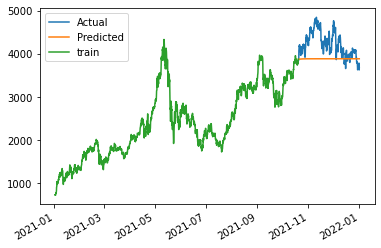

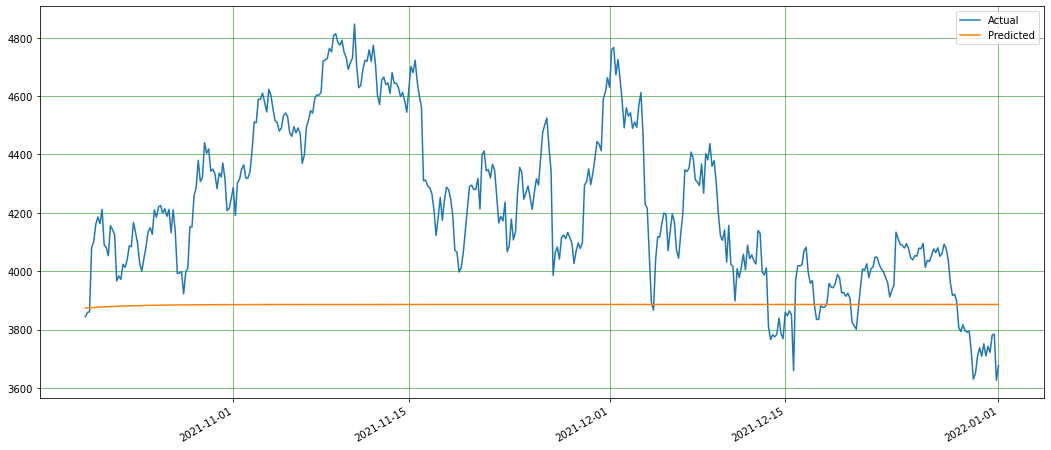

In [29]:
df = pd.DataFrame({'Actual': test_data, 'Predicted': predSeries})
df2 = pd.DataFrame({'train': train_data})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# SARIMAX Model

### Parametrs

In [30]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])

    model=smapi.tsa.statespace.SARIMAX(df6['close'],order=arima_order,seasonal_order=(1,1,1,12))
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=506.503
ARIMA(0, 0, 1) RMSE=507.868
ARIMA(0, 0, 2) RMSE=509.017
ARIMA(0, 1, 0) RMSE=437.704
ARIMA(0, 1, 1) RMSE=437.246
ARIMA(0, 1, 2) RMSE=437.761
ARIMA(0, 2, 0) RMSE=15782.741
ARIMA(0, 2, 1) RMSE=396.689
ARIMA(0, 2, 2) RMSE=394.020
ARIMA(1, 0, 0) RMSE=384.101
ARIMA(1, 0, 1) RMSE=492.750
ARIMA(1, 0, 2) RMSE=513.211
ARIMA(1, 1, 0) RMSE=437.268
ARIMA(1, 1, 1) RMSE=437.393
ARIMA(1, 1, 2) RMSE=437.881
ARIMA(1, 2, 0) RMSE=14214.322
ARIMA(1, 2, 1) RMSE=394.450
ARIMA(1, 2, 2) RMSE=394.254
ARIMA(2, 0, 0) RMSE=487.659
ARIMA(2, 0, 1) RMSE=440.080
ARIMA(2, 0, 2) RMSE=419.923
ARIMA(2, 1, 0) RMSE=437.643
ARIMA(2, 1, 1) RMSE=437.778
ARIMA(2, 1, 2) RMSE=437.728
ARIMA(2, 2, 0) RMSE=10323.459
ARIMA(2, 2, 1) RMSE=394.177
ARIMA(2, 2, 2) RMSE=393.887
ARIMA(4, 0, 0) RMSE=477.176
ARIMA(4, 0, 1) RMSE=410.178
ARIMA(4, 0, 2) RMSE=436.518
ARIMA(4, 1, 0) RMSE=437.696
ARIMA(4, 1, 1) RMSE=437.155
ARIMA(4, 1, 2) RMSE=410.685
ARIMA(4, 2, 0) RMSE=6304.361
ARIMA(4, 2, 1) RMSE=394.154
ARIMA(4, 2, 2

In [31]:
Xtest = data
train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

df5 = test_data.copy()
df5['close'].loc[:] = np.nan

df6 = pd.concat([train_data,df5])

model=smapi.tsa.statespace.SARIMAX(df6['close'],order=(best_cfg),seasonal_order=(1,1,1,12))
results=model.fit()

In [32]:
preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
predSeries = pd.Series(preds.tolist(), index = test_data.index)

### Best Parameter selected

# Evaluation Measures on Test data

# MSE

In [33]:
#y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse2=mean_squared_error(y_test,predSeries) # calculating the mse score
print('Mean Squared Error: ', round(test_mse2,5)) #pritng the results 

Mean Squared Error:  147533.40444


# MAE

In [34]:
test_MAE2=mean_absolute_error(y_test,predSeries) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE2,5)) #pritng the results 

Mean Absolute Error:  317.05631


# RMSE

In [35]:
test_rmse2=np.sqrt(test_mse2) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse2,5)) #pritng the results 

Mean Squared Error:  384.10077


# MAPE

In [36]:
test_mape2=mean_absolute_percentage_error(y_test,predSeries) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape2,5)) #pritng the results 

Mean Absolute Error:  0.07317


# --------------------------------------------------------------------------------------------------

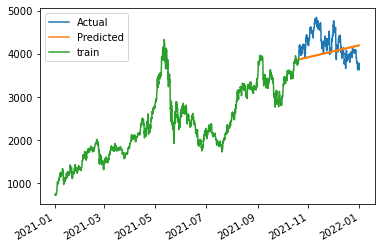

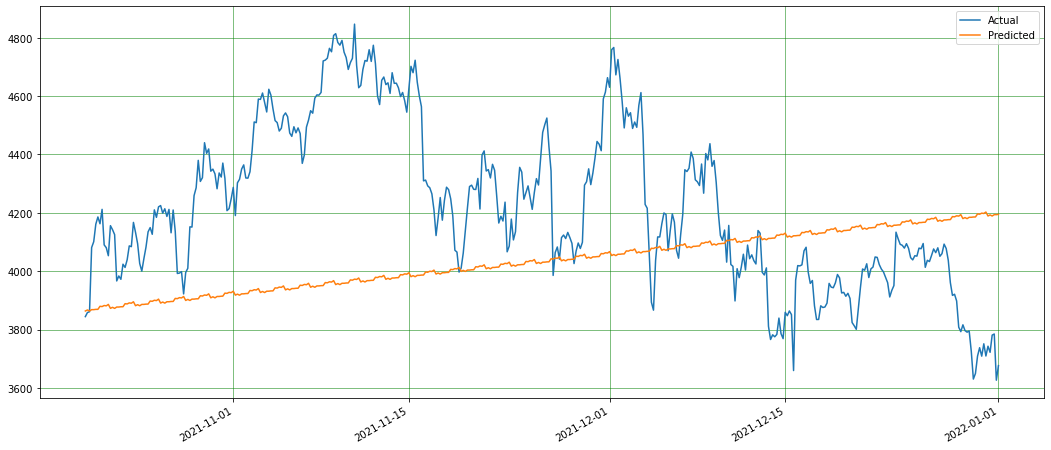

In [37]:
df = pd.DataFrame({'Actual': test_data['close'], 'Predicted': predSeries})
df2 = pd.DataFrame({'train': train_data['close']})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# MLP Regression Model

### Parametrs

In [38]:
params = { 
    'max_iter': [100,200,300,400,500,600],
    'momentum':[0.7,0.8,0.9],
    'learning_rate_init':[0.001,0.002,0.004],
    'hidden_layer_sizes':[(100,),(300,),(200,)]
}

In [39]:
%%time
mlp=MLPRegressor(verbose=True) # calling MLP model for training 
Model_R = RandomizedSearchCV(estimator = mlp, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Iteration 1, loss = 4187541.74753670
Iteration 2, loss = 3377438.01132079
Iteration 3, loss = 2672099.89038052
Iteration 4, loss = 2058324.53413826
Iteration 5, loss = 1535420.91019139
Iteration 6, loss = 1095488.30988552
Iteration 7, loss = 744930.23172504
Iteration 8, loss = 484284.09565207
Iteration 9, loss = 316576.20676447
Iteration 10, loss = 222912.52706956
Iteration 11, loss = 189362.56021233
Iteration 12, loss = 186034.37690742
Iteration 13, loss = 190580.80820530
Iteration 14, loss = 193516.68235133
Iteration 15, loss = 191768.21817498
Iteration 16, loss = 188314.19399483
Iteration 17, loss = 185408.02136467
Iteration 18, loss = 183733.33754390
Iteration 19, loss = 183384.15680727
Iteration 20, loss = 183593.87506852
Iteration 21, loss = 183711.29651474
Iteration 22, loss = 183648.60403433
Iteration 23, loss = 183460.41065610
Iteration 24, loss = 183373.85605702
Iteration 25, loss = 183322.74288144
Iteration 26, loss = 183318.21005028
Iteration 27, loss = 183389.36084127
Iter

Iteration 229, loss = 143755.06510883
Iteration 230, loss = 142041.27363460
Iteration 231, loss = 142157.81139159
Iteration 232, loss = 140987.78575077
Iteration 233, loss = 141408.92157901
Iteration 234, loss = 140858.30447979
Iteration 235, loss = 141032.82399468
Iteration 236, loss = 140297.36836629
Iteration 237, loss = 140103.42642095
Iteration 238, loss = 141903.71307630
Iteration 239, loss = 139245.07817605
Iteration 240, loss = 138939.67325100
Iteration 241, loss = 138736.16823697
Iteration 242, loss = 138487.32501288
Iteration 243, loss = 138708.76058281
Iteration 244, loss = 137912.61474230
Iteration 245, loss = 137442.62854438
Iteration 246, loss = 137781.35253352
Iteration 247, loss = 137436.20521314
Iteration 248, loss = 137911.94787455
Iteration 249, loss = 137938.51350516
Iteration 250, loss = 136356.76462218
Iteration 251, loss = 136818.22397374
Iteration 252, loss = 136023.84359335
Iteration 253, loss = 135154.97922235
Iteration 254, loss = 134879.29868044
Iteration 25

Iteration 57, loss = 278318.66043350
Iteration 58, loss = 278284.00320177
Iteration 59, loss = 278047.39248570
Iteration 60, loss = 277903.22182969
Iteration 61, loss = 277910.03608231
Iteration 62, loss = 277985.54808973
Iteration 63, loss = 277482.35375650
Iteration 64, loss = 277421.33986933
Iteration 65, loss = 277145.31202468
Iteration 66, loss = 277199.71981702
Iteration 67, loss = 277042.83469503
Iteration 68, loss = 276724.54074977
Iteration 69, loss = 276989.43429133
Iteration 70, loss = 276667.88591839
Iteration 71, loss = 276311.79451811
Iteration 72, loss = 276545.94526029
Iteration 73, loss = 275979.83602234
Iteration 74, loss = 275863.45606975
Iteration 75, loss = 276199.56158373
Iteration 76, loss = 275558.50466189
Iteration 77, loss = 275723.65970189
Iteration 78, loss = 275531.04686014
Iteration 79, loss = 274989.23504938
Iteration 80, loss = 274818.46908678
Iteration 81, loss = 274598.44992851
Iteration 82, loss = 274369.97187955
Iteration 83, loss = 274333.38050919
I

Iteration 285, loss = 200433.73443366
Iteration 286, loss = 203002.52901886
Iteration 287, loss = 201726.46629551
Iteration 288, loss = 199945.92770665
Iteration 289, loss = 198862.40090229
Iteration 290, loss = 197814.42931362
Iteration 291, loss = 198082.22638416
Iteration 292, loss = 195367.23558674
Iteration 293, loss = 195512.62188478
Iteration 294, loss = 198597.01325382
Iteration 295, loss = 197165.29546695
Iteration 296, loss = 193813.94715888
Iteration 297, loss = 194284.32802423
Iteration 298, loss = 193711.86407028
Iteration 299, loss = 192385.06359776
Iteration 300, loss = 191364.12522090
Iteration 301, loss = 190680.23144114
Iteration 302, loss = 190900.95368972
Iteration 303, loss = 190424.93605755
Iteration 304, loss = 188524.23130938
Iteration 305, loss = 189066.28924062
Iteration 306, loss = 190433.47325994
Iteration 307, loss = 189124.24052391
Iteration 308, loss = 187795.41848629
Iteration 309, loss = 188567.73617602
Iteration 310, loss = 185446.21036623
Iteration 31

Iteration 114, loss = 179697.24946593
Iteration 115, loss = 179512.04922502
Iteration 116, loss = 179393.02697133
Iteration 117, loss = 179343.58826495
Iteration 118, loss = 179339.22741828
Iteration 119, loss = 179035.80889912
Iteration 120, loss = 178891.25025564
Iteration 121, loss = 178752.02274317
Iteration 122, loss = 178642.89452089
Iteration 123, loss = 178711.78023258
Iteration 124, loss = 178256.05226508
Iteration 125, loss = 178265.51965150
Iteration 126, loss = 178089.01419542
Iteration 127, loss = 178267.15926495
Iteration 128, loss = 177882.86023547
Iteration 129, loss = 177644.49303050
Iteration 130, loss = 177466.71241417
Iteration 131, loss = 177371.19655423
Iteration 132, loss = 177134.54773196
Iteration 133, loss = 177040.26879430
Iteration 134, loss = 176875.66618328
Iteration 135, loss = 176739.32606750
Iteration 136, loss = 176512.23919442
Iteration 137, loss = 176462.09763559
Iteration 138, loss = 176222.23335617
Iteration 139, loss = 176496.78317778
Iteration 14

Iteration 339, loss = 151200.31043356
Iteration 340, loss = 150050.21947282
Iteration 341, loss = 149884.87707519
Iteration 342, loss = 149797.39597151
Iteration 343, loss = 149776.99353678
Iteration 344, loss = 149436.41266077
Iteration 345, loss = 149565.25713795
Iteration 346, loss = 149282.85689111
Iteration 347, loss = 149060.47570899
Iteration 348, loss = 149219.92226700
Iteration 349, loss = 148999.89537147
Iteration 350, loss = 148994.06579632
Iteration 351, loss = 148692.42792104
Iteration 352, loss = 148967.26640881
Iteration 353, loss = 148352.76331162
Iteration 354, loss = 148708.85562276
Iteration 355, loss = 148184.05983834
Iteration 356, loss = 148076.08409967
Iteration 357, loss = 148007.58061571
Iteration 358, loss = 148459.10491355
Iteration 359, loss = 147981.65922860
Iteration 360, loss = 147759.16360997
Iteration 361, loss = 148826.22651189
Iteration 362, loss = 147225.70262665
Iteration 363, loss = 148172.48758042
Iteration 364, loss = 147461.38764988
Iteration 36

Iteration 587, loss = 112191.69400398
Iteration 588, loss = 112258.43247433
Iteration 589, loss = 112512.14407038
Iteration 590, loss = 111755.50019328
Iteration 591, loss = 111665.47673190
Iteration 592, loss = 111411.87606529
Iteration 593, loss = 111754.78826247
Iteration 594, loss = 113087.08509207
Iteration 595, loss = 111341.73586211
Iteration 596, loss = 111212.28010850
Iteration 597, loss = 112129.25474638
Iteration 598, loss = 110737.50849168
Iteration 599, loss = 110151.75132638
Iteration 600, loss = 110698.21543225
Iteration 1, loss = 2278191.87325669
Iteration 2, loss = 1912313.54408060
Iteration 3, loss = 1588951.78674098
Iteration 4, loss = 1305955.65380348
Iteration 5, loss = 1061549.67203521
Iteration 6, loss = 858682.90921467
Iteration 7, loss = 688962.47887069
Iteration 8, loss = 556610.25100803
Iteration 9, loss = 454020.87097029
Iteration 10, loss = 380631.59735006
Iteration 11, loss = 330814.77218871
Iteration 12, loss = 303936.22770256
Iteration 13, loss = 287960.

Iteration 220, loss = 258962.28431727
Iteration 221, loss = 258866.78545439
Iteration 222, loss = 258525.28360340
Iteration 223, loss = 258453.58023141
Iteration 224, loss = 258147.43593587
Iteration 225, loss = 258124.49326149
Iteration 226, loss = 257898.61501515
Iteration 227, loss = 257781.83426150
Iteration 228, loss = 257355.31414745
Iteration 229, loss = 257220.90400340
Iteration 230, loss = 257071.32104186
Iteration 231, loss = 256773.93939996
Iteration 232, loss = 256579.31097856
Iteration 233, loss = 256502.64335765
Iteration 234, loss = 256549.31921927
Iteration 235, loss = 255961.14096272
Iteration 236, loss = 255961.68242853
Iteration 237, loss = 255565.35367420
Iteration 238, loss = 255658.26972804
Iteration 239, loss = 255214.72303842
Iteration 240, loss = 255139.07194250
Iteration 241, loss = 255054.20254029
Iteration 242, loss = 255190.23755924
Iteration 243, loss = 254987.96456329
Iteration 244, loss = 254620.10865263
Iteration 245, loss = 253689.88775271
Iteration 24

Iteration 451, loss = 203885.82865684
Iteration 452, loss = 202638.37424188
Iteration 453, loss = 202675.42017385
Iteration 454, loss = 201812.07660954
Iteration 455, loss = 202500.25649154
Iteration 456, loss = 201577.40624633
Iteration 457, loss = 201183.63876876
Iteration 458, loss = 200822.31947629
Iteration 459, loss = 200697.13160869
Iteration 460, loss = 200581.19460628
Iteration 461, loss = 199946.02273867
Iteration 462, loss = 200275.37478552
Iteration 463, loss = 199822.17457129
Iteration 464, loss = 199467.77917320
Iteration 465, loss = 201078.56661926
Iteration 466, loss = 197968.32174542
Iteration 467, loss = 199415.80235742
Iteration 468, loss = 197935.63710965
Iteration 469, loss = 197626.80286190
Iteration 470, loss = 198678.85894948
Iteration 471, loss = 198067.11333998
Iteration 472, loss = 196905.31487596
Iteration 473, loss = 196554.92277100
Iteration 474, loss = 196096.89969119
Iteration 475, loss = 195732.69611936
Iteration 476, loss = 195098.58068538
Iteration 47

Iteration 87, loss = 173293.31350540
Iteration 88, loss = 173075.62253313
Iteration 89, loss = 172594.58011054
Iteration 90, loss = 172282.66535615
Iteration 91, loss = 171803.53351040
Iteration 92, loss = 172010.16669715
Iteration 93, loss = 171559.11112041
Iteration 94, loss = 170853.40332717
Iteration 95, loss = 171249.44381663
Iteration 96, loss = 170239.56364279
Iteration 97, loss = 170103.63060215
Iteration 98, loss = 169665.45571043
Iteration 99, loss = 169401.20786205
Iteration 100, loss = 169551.37697501
Iteration 101, loss = 169123.98879361
Iteration 102, loss = 168655.84716589
Iteration 103, loss = 168069.04733631
Iteration 104, loss = 167644.67805037
Iteration 105, loss = 167554.73464093
Iteration 106, loss = 167159.68231332
Iteration 107, loss = 166901.86349626
Iteration 108, loss = 167161.04395088
Iteration 109, loss = 166978.26444365
Iteration 110, loss = 166063.45224158
Iteration 111, loss = 165648.01391278
Iteration 112, loss = 165694.08597294
Iteration 113, loss = 165

Iteration 324, loss = 109851.10887987
Iteration 325, loss = 111390.67976520
Iteration 326, loss = 110295.59712027
Iteration 327, loss = 109883.84463951
Iteration 328, loss = 109693.94435014
Iteration 329, loss = 108699.10047364
Iteration 330, loss = 108717.50961328
Iteration 331, loss = 111502.80440738
Iteration 332, loss = 109927.01719483
Iteration 333, loss = 107200.10311264
Iteration 334, loss = 107892.87357100
Iteration 335, loss = 107448.24747964
Iteration 336, loss = 108737.44598215
Iteration 337, loss = 105872.93091525
Iteration 338, loss = 106602.81514780
Iteration 339, loss = 105001.95709515
Iteration 340, loss = 105127.50065561
Iteration 341, loss = 104953.90738890
Iteration 342, loss = 106553.08718203
Iteration 343, loss = 104374.29140564
Iteration 344, loss = 103641.06655550
Iteration 345, loss = 103972.13275572
Iteration 346, loss = 104823.66158218
Iteration 347, loss = 103714.41836748
Iteration 348, loss = 104488.33710968
Iteration 349, loss = 102732.16719350
Iteration 35

Iteration 141, loss = 234894.66966869
Iteration 142, loss = 234566.58003322
Iteration 143, loss = 232240.93518221
Iteration 144, loss = 232348.78000741
Iteration 145, loss = 230550.76904101
Iteration 146, loss = 229986.55248419
Iteration 147, loss = 229568.41524870
Iteration 148, loss = 229397.70621690
Iteration 149, loss = 228052.56617076
Iteration 150, loss = 227686.24808356
Iteration 151, loss = 226701.34732250
Iteration 152, loss = 226851.58083794
Iteration 153, loss = 228508.42351614
Iteration 154, loss = 225047.79364754
Iteration 155, loss = 225162.22743172
Iteration 156, loss = 223947.86852141
Iteration 157, loss = 223353.84395313
Iteration 158, loss = 224336.17877671
Iteration 159, loss = 222558.20648440
Iteration 160, loss = 222190.76912881
Iteration 161, loss = 220488.75579014
Iteration 162, loss = 220212.00068651
Iteration 163, loss = 226197.13764874
Iteration 164, loss = 222521.65716493
Iteration 165, loss = 218024.15032917
Iteration 166, loss = 219669.46625542
Iteration 16

Iteration 369, loss = 81586.06968616
Iteration 370, loss = 82041.88130292
Iteration 371, loss = 83736.18544554
Iteration 372, loss = 81952.15279986
Iteration 373, loss = 81992.22885433
Iteration 374, loss = 81299.15191998
Iteration 375, loss = 80115.68503787
Iteration 376, loss = 79951.03910028
Iteration 377, loss = 81362.02111594
Iteration 378, loss = 82357.09884981
Iteration 379, loss = 81662.29894758
Iteration 380, loss = 88113.77445995
Iteration 381, loss = 80318.61574515
Iteration 382, loss = 83586.76831346
Iteration 383, loss = 84000.25233213
Iteration 384, loss = 82568.07320178
Iteration 385, loss = 79577.67474538
Iteration 386, loss = 77858.42502037
Iteration 387, loss = 77489.18618380
Iteration 388, loss = 78259.86103361
Iteration 389, loss = 77213.53375093
Iteration 390, loss = 79635.01525952
Iteration 391, loss = 78170.59694034
Iteration 392, loss = 79262.31721098
Iteration 393, loss = 77087.12317984
Iteration 394, loss = 76424.90121165
Iteration 395, loss = 76025.77097259
I

Iteration 55, loss = 271082.28585044
Iteration 56, loss = 269712.18230850
Iteration 57, loss = 270384.73757004
Iteration 58, loss = 268777.12125136
Iteration 59, loss = 268399.45456448
Iteration 60, loss = 267685.60744609
Iteration 61, loss = 266785.86044675
Iteration 62, loss = 268919.93624038
Iteration 63, loss = 266729.02377091
Iteration 64, loss = 265431.99715594
Iteration 65, loss = 265974.19117504
Iteration 66, loss = 264176.72854975
Iteration 67, loss = 263447.46767597
Iteration 68, loss = 262399.56531627
Iteration 69, loss = 263656.02976755
Iteration 70, loss = 265331.07711230
Iteration 71, loss = 264757.89334144
Iteration 72, loss = 262540.26433374
Iteration 73, loss = 260567.07333761
Iteration 74, loss = 260301.76109663
Iteration 75, loss = 259453.42435488
Iteration 76, loss = 259379.09793002
Iteration 77, loss = 258556.10790496
Iteration 78, loss = 256978.84923654
Iteration 79, loss = 257368.21218633
Iteration 80, loss = 255606.00547890
Iteration 81, loss = 254118.96588778
I

Iteration 62, loss = 182635.37356351
Iteration 63, loss = 182585.07253247
Iteration 64, loss = 182541.67440353
Iteration 65, loss = 182491.08181014
Iteration 66, loss = 182468.38339727
Iteration 67, loss = 182449.27987304
Iteration 68, loss = 182450.89893148
Iteration 69, loss = 182318.97852478
Iteration 70, loss = 182277.96569969
Iteration 71, loss = 182218.90848011
Iteration 72, loss = 182202.27325292
Iteration 73, loss = 182146.46160526
Iteration 74, loss = 182126.12834317
Iteration 75, loss = 182082.85831821
Iteration 76, loss = 181994.58924862
Iteration 77, loss = 181948.18070064
Iteration 78, loss = 181888.91594266
Iteration 79, loss = 181839.15137923
Iteration 80, loss = 181766.31249301
Iteration 81, loss = 181818.79895759
Iteration 82, loss = 181798.61700085
Iteration 83, loss = 181623.23997916
Iteration 84, loss = 181534.24854822
Iteration 85, loss = 181451.14152487
Iteration 86, loss = 181470.61026713
Iteration 87, loss = 181380.00846596
Iteration 88, loss = 181384.94013903
I

Iteration 92, loss = 277736.90489372
Iteration 93, loss = 277642.21755055
Iteration 94, loss = 277597.85916821
Iteration 95, loss = 277527.34964627
Iteration 96, loss = 277524.52572274
Iteration 97, loss = 277283.80676925
Iteration 98, loss = 277108.19624669
Iteration 99, loss = 277134.99121919
Iteration 100, loss = 276995.03731827
Iteration 101, loss = 276846.43908164
Iteration 102, loss = 276790.37108025
Iteration 103, loss = 276806.53968620
Iteration 104, loss = 276593.62917544
Iteration 105, loss = 276658.94096685
Iteration 106, loss = 276346.67999590
Iteration 107, loss = 276229.25943128
Iteration 108, loss = 276184.40143267
Iteration 109, loss = 276077.51466314
Iteration 110, loss = 275976.06510626
Iteration 111, loss = 275827.44983421
Iteration 112, loss = 275759.68482097
Iteration 113, loss = 275455.51861779
Iteration 114, loss = 275519.80399297
Iteration 115, loss = 275481.94079841
Iteration 116, loss = 275283.94120846
Iteration 117, loss = 275101.69190311
Iteration 118, loss 

Iteration 122, loss = 179377.30991045
Iteration 123, loss = 179235.27130610
Iteration 124, loss = 179028.65039087
Iteration 125, loss = 178945.15517880
Iteration 126, loss = 178911.13815509
Iteration 127, loss = 178699.79256010
Iteration 128, loss = 178612.48903049
Iteration 129, loss = 178571.86256802
Iteration 130, loss = 178482.50603331
Iteration 131, loss = 178415.70200910
Iteration 132, loss = 178246.48807111
Iteration 133, loss = 178291.50484067
Iteration 134, loss = 178237.58254476
Iteration 135, loss = 177938.76249523
Iteration 136, loss = 177896.16847840
Iteration 137, loss = 177736.91179192
Iteration 138, loss = 177700.72912197
Iteration 139, loss = 177461.06852563
Iteration 140, loss = 177386.36068131
Iteration 141, loss = 177454.47769101
Iteration 142, loss = 177162.90089001
Iteration 143, loss = 177025.37623224
Iteration 144, loss = 177030.58391631
Iteration 145, loss = 176844.74813313
Iteration 146, loss = 177273.05062093
Iteration 147, loss = 176625.74427968
Iteration 14

Iteration 344, loss = 156259.02681356
Iteration 345, loss = 156403.89832094
Iteration 346, loss = 156970.63141933
Iteration 347, loss = 156240.70816199
Iteration 348, loss = 156023.87671702
Iteration 349, loss = 156130.02425129
Iteration 350, loss = 155754.34343946
Iteration 351, loss = 155705.54254162
Iteration 352, loss = 155590.02114926
Iteration 353, loss = 155673.96433577
Iteration 354, loss = 156464.20074672
Iteration 355, loss = 155834.88188240
Iteration 356, loss = 155376.74852814
Iteration 357, loss = 155725.02761299
Iteration 358, loss = 155099.69798334
Iteration 359, loss = 155067.12939368
Iteration 360, loss = 154846.72137904
Iteration 361, loss = 154854.11267258
Iteration 362, loss = 154919.03718903
Iteration 363, loss = 155077.10153924
Iteration 364, loss = 155053.43536469
Iteration 365, loss = 154899.04873090
Iteration 366, loss = 154388.78789753
Iteration 367, loss = 154433.02608699
Iteration 368, loss = 154648.18199952
Iteration 369, loss = 154125.15129950
Iteration 37

Iteration 70, loss = 279298.99952020
Iteration 71, loss = 279261.37379512
Iteration 72, loss = 279244.78843039
Iteration 73, loss = 279101.32908388
Iteration 74, loss = 279088.68840773
Iteration 75, loss = 278975.84556050
Iteration 76, loss = 278894.41905960
Iteration 77, loss = 278814.89388079
Iteration 78, loss = 278767.97489748
Iteration 79, loss = 278887.68674213
Iteration 80, loss = 278698.75221978
Iteration 81, loss = 278567.65028210
Iteration 82, loss = 278448.31448707
Iteration 83, loss = 278432.94467686
Iteration 84, loss = 278324.67034822
Iteration 85, loss = 278300.68307079
Iteration 86, loss = 278369.95324211
Iteration 87, loss = 278331.44397155
Iteration 88, loss = 278168.59693030
Iteration 89, loss = 277991.72304633
Iteration 90, loss = 278033.35696827
Iteration 91, loss = 277802.32755740
Iteration 92, loss = 277763.57909846
Iteration 93, loss = 277637.72888674
Iteration 94, loss = 277551.86441223
Iteration 95, loss = 277507.96331850
Iteration 96, loss = 277391.84763014
I

Iteration 288, loss = 244933.10099694
Iteration 289, loss = 244741.56821378
Iteration 290, loss = 244666.87688469
Iteration 291, loss = 244288.16470483
Iteration 292, loss = 244542.33100985
Iteration 293, loss = 244745.36657335
Iteration 294, loss = 243693.95385071
Iteration 295, loss = 244556.44166928
Iteration 296, loss = 244034.18298000
Iteration 297, loss = 243497.74257857
Iteration 298, loss = 242826.50188055
Iteration 299, loss = 243139.25291606
Iteration 300, loss = 242418.79911546
Iteration 301, loss = 242494.28723749
Iteration 302, loss = 242513.26117656
Iteration 303, loss = 242209.73049520
Iteration 304, loss = 241956.99128051
Iteration 305, loss = 242256.40491159
Iteration 306, loss = 243617.17757053
Iteration 307, loss = 242644.57627615
Iteration 308, loss = 241336.45821016
Iteration 309, loss = 241083.77578847
Iteration 310, loss = 241929.02839592
Iteration 311, loss = 241008.98065692
Iteration 312, loss = 240726.43093824
Iteration 313, loss = 239850.79388385
Iteration 31

Iteration 19, loss = 184312.89731885
Iteration 20, loss = 183774.25032912
Iteration 21, loss = 183442.17242564
Iteration 22, loss = 183332.92946104
Iteration 23, loss = 183274.61016083
Iteration 24, loss = 183315.80054822
Iteration 25, loss = 183332.67502141
Iteration 26, loss = 183295.77169473
Iteration 27, loss = 183275.98488211
Iteration 28, loss = 183247.56101327
Iteration 29, loss = 183211.45238113
Iteration 30, loss = 183186.32569425
Iteration 31, loss = 183193.66933935
Iteration 32, loss = 183202.04889546
Iteration 33, loss = 183131.48078224
Iteration 34, loss = 183106.38928471
Iteration 35, loss = 183086.03990329
Iteration 36, loss = 183074.60826166
Iteration 37, loss = 183050.24649886
Iteration 38, loss = 183069.61657436
Iteration 39, loss = 183092.65639946
Iteration 40, loss = 183014.98403028
Iteration 41, loss = 183014.96130513
Iteration 42, loss = 182945.24178551
Iteration 43, loss = 182999.12182409
Iteration 44, loss = 182963.04713006
Iteration 45, loss = 182889.63986044
I

Iteration 251, loss = 162427.78097320
Iteration 252, loss = 162038.95043391
Iteration 253, loss = 161992.64094859
Iteration 254, loss = 162003.12024145
Iteration 255, loss = 161994.63655528
Iteration 256, loss = 161603.90107859
Iteration 257, loss = 161531.33391509
Iteration 258, loss = 161244.77072335
Iteration 259, loss = 162151.88494400
Iteration 260, loss = 161396.08178650
Iteration 261, loss = 161428.68570805
Iteration 262, loss = 161270.11096168
Iteration 263, loss = 160873.20202541
Iteration 264, loss = 160794.50316822
Iteration 265, loss = 160600.13818831
Iteration 266, loss = 160559.75499443
Iteration 267, loss = 160388.73348626
Iteration 268, loss = 160314.62061444
Iteration 269, loss = 160209.93208191
Iteration 270, loss = 160202.96318177
Iteration 271, loss = 160515.56403545
Iteration 272, loss = 160135.57369135
Iteration 273, loss = 159827.89451707
Iteration 274, loss = 159653.80245294
Iteration 275, loss = 159943.00698145
Iteration 276, loss = 159956.85475812
Iteration 27

Iteration 74, loss = 279259.62376293
Iteration 75, loss = 279162.12490195
Iteration 76, loss = 279146.80839570
Iteration 77, loss = 279084.80240316
Iteration 78, loss = 279043.72240678
Iteration 79, loss = 279058.28975803
Iteration 80, loss = 278979.07948154
Iteration 81, loss = 278817.04769639
Iteration 82, loss = 278820.00745500
Iteration 83, loss = 278937.05556898
Iteration 84, loss = 278808.12321270
Iteration 85, loss = 278554.82322956
Iteration 86, loss = 278739.69425578
Iteration 87, loss = 278632.73650071
Iteration 88, loss = 278493.56376820
Iteration 89, loss = 278302.23141164
Iteration 90, loss = 278463.32834704
Iteration 91, loss = 278368.63262962
Iteration 92, loss = 278179.37419110
Iteration 93, loss = 278115.06535386
Iteration 94, loss = 278040.84352272
Iteration 95, loss = 278001.47287415
Iteration 96, loss = 278028.94365475
Iteration 97, loss = 277881.27159993
Iteration 98, loss = 277752.04056253
Iteration 99, loss = 277652.04060627
Iteration 100, loss = 277654.09487856


Iteration 304, loss = 245195.65503827
Iteration 305, loss = 244758.03270930
Iteration 306, loss = 244394.36146270
Iteration 307, loss = 244279.05672665
Iteration 308, loss = 243856.79521444
Iteration 309, loss = 244343.86616757
Iteration 310, loss = 243585.53771540
Iteration 311, loss = 244147.78876115
Iteration 312, loss = 242960.25542526
Iteration 313, loss = 244498.89299859
Iteration 314, loss = 245697.83957849
Iteration 315, loss = 242353.79043094
Iteration 316, loss = 244558.17277455
Iteration 317, loss = 242830.68356782
Iteration 318, loss = 242125.71188383
Iteration 319, loss = 242003.66540937
Iteration 320, loss = 242014.70596169
Iteration 321, loss = 241504.07962642
Iteration 322, loss = 241622.25559662
Iteration 323, loss = 241109.33676044
Iteration 324, loss = 242069.27318385
Iteration 325, loss = 240749.15276528
Iteration 326, loss = 240272.92679757
Iteration 327, loss = 240273.55939216
Iteration 328, loss = 240521.63602191
Iteration 329, loss = 239855.05511752
Iteration 33

Iteration 138, loss = 161471.00392060
Iteration 139, loss = 161428.25750428
Iteration 140, loss = 161083.49352553
Iteration 141, loss = 161146.07243157
Iteration 142, loss = 161569.80162097
Iteration 143, loss = 162055.81509668
Iteration 144, loss = 160680.69208047
Iteration 145, loss = 160851.55812862
Iteration 146, loss = 161238.54212801
Iteration 147, loss = 160238.45616813
Iteration 148, loss = 160464.36237251
Iteration 149, loss = 159799.02165523
Iteration 150, loss = 160466.81940405
Iteration 151, loss = 160237.22612762
Iteration 152, loss = 159333.87380111
Iteration 153, loss = 159963.34248005
Iteration 154, loss = 158825.18313682
Iteration 155, loss = 158644.27342307
Iteration 156, loss = 158688.57224276
Iteration 157, loss = 158155.49691074
Iteration 158, loss = 159008.18944839
Iteration 159, loss = 157844.65293304
Iteration 160, loss = 158009.62323312
Iteration 161, loss = 158007.63078260
Iteration 162, loss = 157641.34874053
Iteration 163, loss = 157833.35896516
Iteration 16

Iteration 366, loss = 112930.83589746
Iteration 367, loss = 112599.52994600
Iteration 368, loss = 113322.60583280
Iteration 369, loss = 113405.43279955
Iteration 370, loss = 114451.28927300
Iteration 371, loss = 112886.45090608
Iteration 372, loss = 111259.59396972
Iteration 373, loss = 111209.14611132
Iteration 374, loss = 112109.88449485
Iteration 375, loss = 110752.60771342
Iteration 376, loss = 110687.17034125
Iteration 377, loss = 111750.21885491
Iteration 378, loss = 110692.85266329
Iteration 379, loss = 110020.89639160
Iteration 380, loss = 109017.80555513
Iteration 381, loss = 109408.28737100
Iteration 382, loss = 109833.36504129
Iteration 383, loss = 109847.70185099
Iteration 384, loss = 108937.33814679
Iteration 385, loss = 110296.01365658
Iteration 386, loss = 108018.88255386
Iteration 387, loss = 107934.07468576
Iteration 388, loss = 108935.58984501
Iteration 389, loss = 108019.54246037
Iteration 390, loss = 107276.41736806
Iteration 391, loss = 106779.03320371
Iteration 39

Iteration 593, loss = 72797.21037882
Iteration 594, loss = 72232.58813215
Iteration 595, loss = 72104.70891565
Iteration 596, loss = 72805.84803228
Iteration 597, loss = 72617.36419119
Iteration 598, loss = 71405.91834807
Iteration 599, loss = 72126.30070386
Iteration 600, loss = 76256.86858656
Iteration 1, loss = 2483096.12498933
Iteration 2, loss = 1885961.56050051
Iteration 3, loss = 1390141.19157876
Iteration 4, loss = 993887.52080252
Iteration 5, loss = 697396.95165297
Iteration 6, loss = 487922.43523614
Iteration 7, loss = 357123.09257287
Iteration 8, loss = 300406.31707045
Iteration 9, loss = 280698.57178118
Iteration 10, loss = 285854.08785842
Iteration 11, loss = 291720.79151170
Iteration 12, loss = 291977.92161707
Iteration 13, loss = 287846.32589674
Iteration 14, loss = 284433.74691113
Iteration 15, loss = 281713.87093897
Iteration 16, loss = 281343.95656495
Iteration 17, loss = 281628.36910443
Iteration 18, loss = 281598.79122383
Iteration 19, loss = 281423.03103624
Iterati

Iteration 201, loss = 158622.57831609
Iteration 202, loss = 157962.49922998
Iteration 203, loss = 157882.33869901
Iteration 204, loss = 158403.71195289
Iteration 205, loss = 157026.62711169
Iteration 206, loss = 160301.80891952
Iteration 207, loss = 158420.93264369
Iteration 208, loss = 157838.89443048
Iteration 209, loss = 159658.06683268
Iteration 210, loss = 158364.36785611
Iteration 211, loss = 156953.70381304
Iteration 212, loss = 158645.34369269
Iteration 213, loss = 156196.19509501
Iteration 214, loss = 157159.28908697
Iteration 215, loss = 156189.29172981
Iteration 216, loss = 156594.25687314
Iteration 217, loss = 155774.34480237
Iteration 218, loss = 155617.66053430
Iteration 219, loss = 155558.75839558
Iteration 220, loss = 155560.64565472
Iteration 221, loss = 155802.52688097
Iteration 222, loss = 155607.30687869
Iteration 223, loss = 155340.28618995
Iteration 224, loss = 155041.83942678
Iteration 225, loss = 154984.78284708
Iteration 226, loss = 154805.99110528
Iteration 22

Iteration 125, loss = 267060.10156297
Iteration 126, loss = 266534.45754263
Iteration 127, loss = 266542.15937270
Iteration 128, loss = 266741.49073099
Iteration 129, loss = 265978.19324513
Iteration 130, loss = 265903.70672732
Iteration 131, loss = 265583.36465381
Iteration 132, loss = 265344.31183993
Iteration 133, loss = 264991.62679114
Iteration 134, loss = 264626.72382283
Iteration 135, loss = 264580.95395086
Iteration 136, loss = 264550.13033868
Iteration 137, loss = 266035.59482426
Iteration 138, loss = 264235.27364253
Iteration 139, loss = 264142.74185286
Iteration 140, loss = 263774.60576977
Iteration 141, loss = 263345.31151438
Iteration 142, loss = 262528.17422324
Iteration 143, loss = 263180.29928107
Iteration 144, loss = 262208.20103233
Iteration 145, loss = 262346.38988613
Iteration 146, loss = 262113.41150993
Iteration 147, loss = 262468.53007206
Iteration 148, loss = 262812.76491452
Iteration 149, loss = 261539.11987368
Iteration 150, loss = 261307.63408900
Iteration 15

Iteration 61, loss = 294941.74475591
Iteration 62, loss = 295263.17802622
Iteration 63, loss = 294238.23666800
Iteration 64, loss = 292215.87505144
Iteration 65, loss = 291250.26647843
Iteration 66, loss = 290253.33407136
Iteration 67, loss = 289442.95654634
Iteration 68, loss = 288478.53903919
Iteration 69, loss = 287947.33340838
Iteration 70, loss = 287076.37491465
Iteration 71, loss = 285543.46073761
Iteration 72, loss = 284341.78569455
Iteration 73, loss = 283379.69831894
Iteration 74, loss = 282578.42948023
Iteration 75, loss = 282329.67811152
Iteration 76, loss = 280623.12815795
Iteration 77, loss = 280556.12682436
Iteration 78, loss = 279616.72627501
Iteration 79, loss = 277333.17351658
Iteration 80, loss = 277537.98687770
Iteration 81, loss = 275692.40319495
Iteration 82, loss = 274238.43474046
Iteration 83, loss = 274487.45023060
Iteration 84, loss = 272935.98868640
Iteration 85, loss = 271408.19242508
Iteration 86, loss = 270691.72325005
Iteration 87, loss = 269993.63778417
I

RandomizedSearchCV(cv=2, estimator=MLPRegressor(verbose=True),
                   param_distributions={'hidden_layer_sizes': [(100,), (300,),
                                                               (200,)],
                                        'learning_rate_init': [0.001, 0.002,
                                                               0.004],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600],
                                        'momentum': [0.7, 0.8, 0.9]})

### Best Parameter selected

In [40]:
Model_R.best_params_

{'momentum': 0.9,
 'max_iter': 400,
 'learning_rate_init': 0.002,
 'hidden_layer_sizes': (200,)}

# Evaluation Measures on Test data

# MSE

In [41]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse3=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse3,5)) #pritng the results 

Mean Squared Error:  378834.81647


# MAE

In [42]:
test_MAE3=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE3,5)) #pritng the results 

Mean Absolute Error:  521.05852


# RMSE

In [43]:
test_rmse3=np.sqrt(test_mse3) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse3,5)) #pritng the results 

Mean Squared Error:  615.49559


# MAPE

In [44]:
test_mape3=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape3,5)) #pritng the results 

Mean Absolute Error:  0.11961


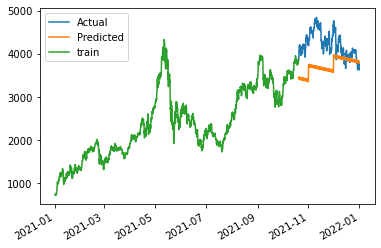

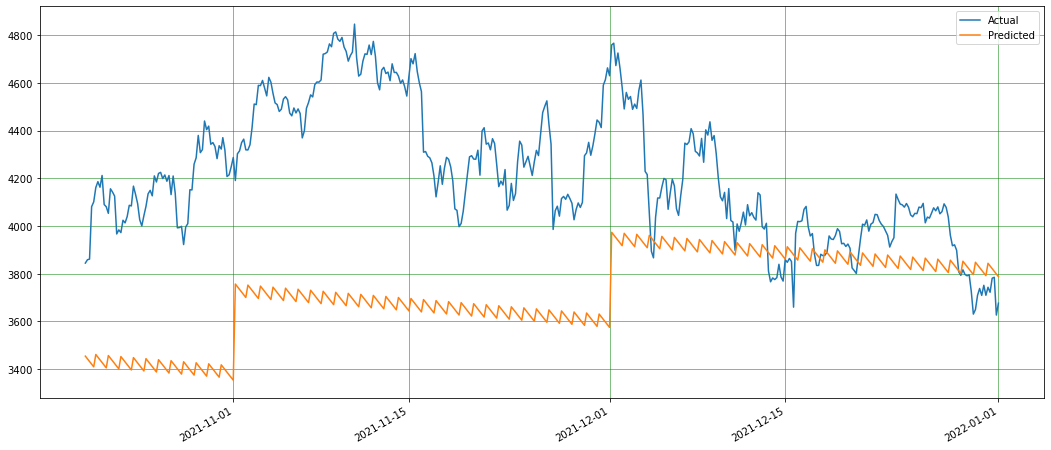

In [45]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Ridge Regression Model

### Parametrs

In [46]:
params = { 
    'alpha': [1.0,2.0,3.0,4.0],
    'max_iter':[100,200,300,400,500],
    'tol':[0.001,0.002,0.003,0.004]
}

In [47]:
%%time
Ridge=linear_model.Ridge(alpha=4.0) # calling Ridge model for training 
Model_R = RandomizedSearchCV(estimator = Ridge, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 55.6 ms


RandomizedSearchCV(cv=2, estimator=Ridge(alpha=4.0),
                   param_distributions={'alpha': [1.0, 2.0, 3.0, 4.0],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'tol': [0.001, 0.002, 0.003, 0.004]})

### Best Parameter selected

In [48]:
Model_R.best_params_

{'tol': 0.002, 'max_iter': 500, 'alpha': 4.0}

# Evaluation Measures on Test data

# MSE

In [49]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse7=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse7,5)) #pritng the results 

Mean Squared Error:  340107.33346


# MAE

In [50]:
test_MAE7=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE7,5)) #pritng the results 

Mean Absolute Error:  487.76229


# RMSE

In [51]:
test_rmse7=np.sqrt(test_mse7) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse7,5)) #pritng the results 

Mean Squared Error:  583.18722


# MAPE

In [52]:
test_mape7=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape7,5)) #pritng the results 

Mean Absolute Error:  0.11194


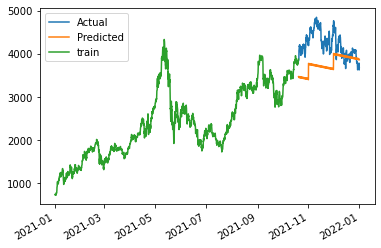

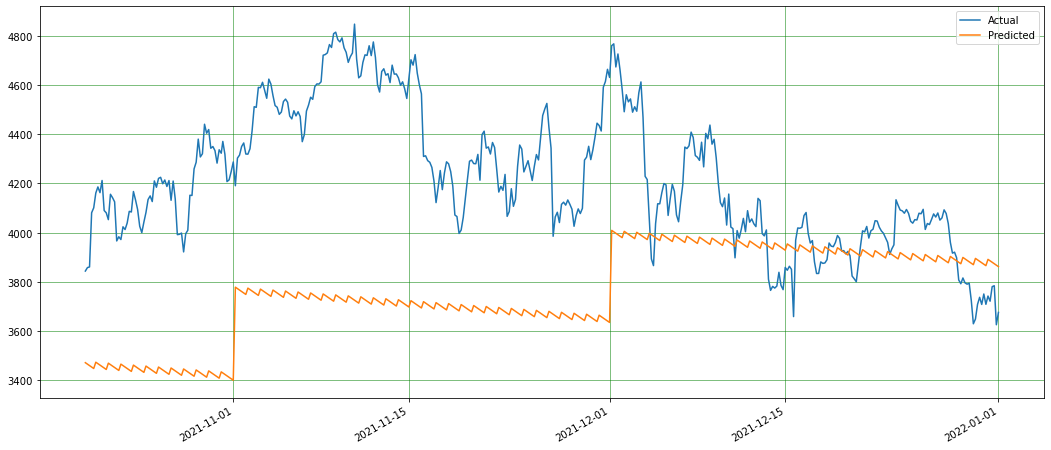

In [53]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forest Regression Model

### Parametrs

In [54]:
params = { 
    'max_depth': [10,20,30,40,50],
    'random_state':[10,20,30,40],
    'min_samples_leaf':[10,20,30,40,50]
}

In [55]:
%%time
RF=RandomForestRegressor() # calling RF model for training 
Model_R = RandomizedSearchCV(estimator = RF, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 2.05 s


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'min_samples_leaf': [10, 20, 30, 40,
                                                             50],
                                        'random_state': [10, 20, 30, 40]})

### Best Parameter selected

In [56]:
Model_R.best_params_

{'random_state': 20, 'min_samples_leaf': 50, 'max_depth': 10}

# Evaluation Measures on Test data

# MSE

In [57]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse8=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse8,5)) #pritng the results 

Mean Squared Error:  790452.49506


# MAE

In [58]:
test_MAE8=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE8,5)) #pritng the results 

Mean Absolute Error:  851.52437


# RMSE

In [59]:
test_rmse8=np.sqrt(test_mse8) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse8,5)) #pritng the results 

Mean Squared Error:  889.07395


# MAPE

In [60]:
test_mape8=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape8,5)) #pritng the results 

Mean Absolute Error:  0.19946


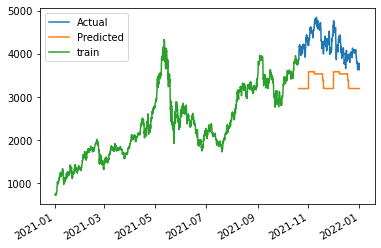

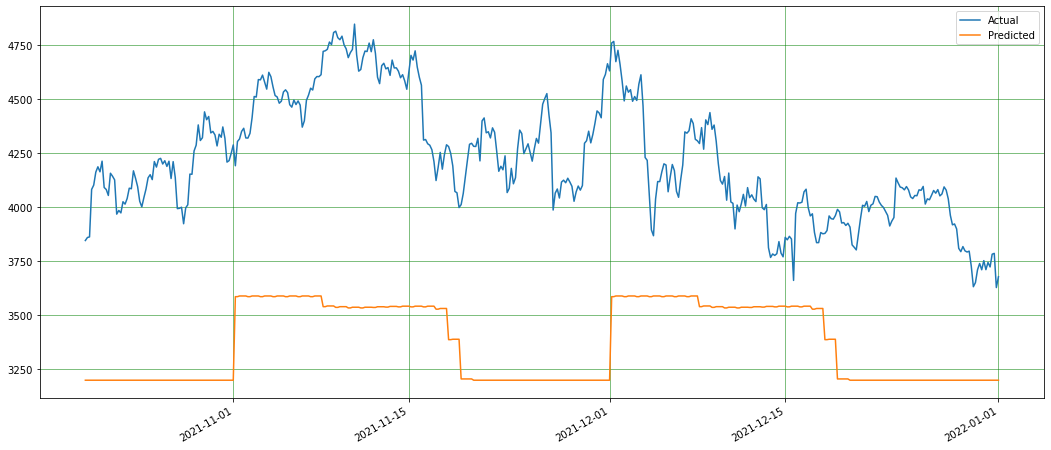

In [61]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# XGBoost Model

### Parametrs

In [62]:
params = { 
    'base_score': [0.1,0.2,0.3,0.4,0.5,0.6],
    'learning_rate':[0.1,0.2,0.3],
    'n_estimators':[100,200,300,400],
    'max_depth':[10,20,30,40,50]
    
}

In [63]:
%%time
XG=xgboost.XGBRegressor() # calling Xgboost model for training 
Model_R = RandomizedSearchCV(estimator = XG, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 15.2 s


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

### Best Parameter selected

In [64]:
Model_R.best_params_

{'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.1, 'base_score': 0.6}

# Evaluation Measures on Test data

# MSE

In [65]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse9=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse9,5)) #pritng the results 

Mean Squared Error:  558201.90849


# MAE

In [66]:
test_MAE9=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE9,5)) #pritng the results 

Mean Absolute Error:  662.91939


# RMSE

In [67]:
test_rmse9=np.sqrt(test_mse9) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse9,5)) #pritng the results 

Mean Squared Error:  747.12911


# MAPE

In [68]:
test_mape9=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape9,5)) #pritng the results 

Mean Absolute Error:  0.15293


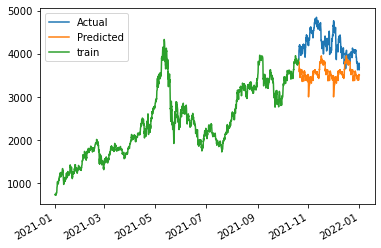

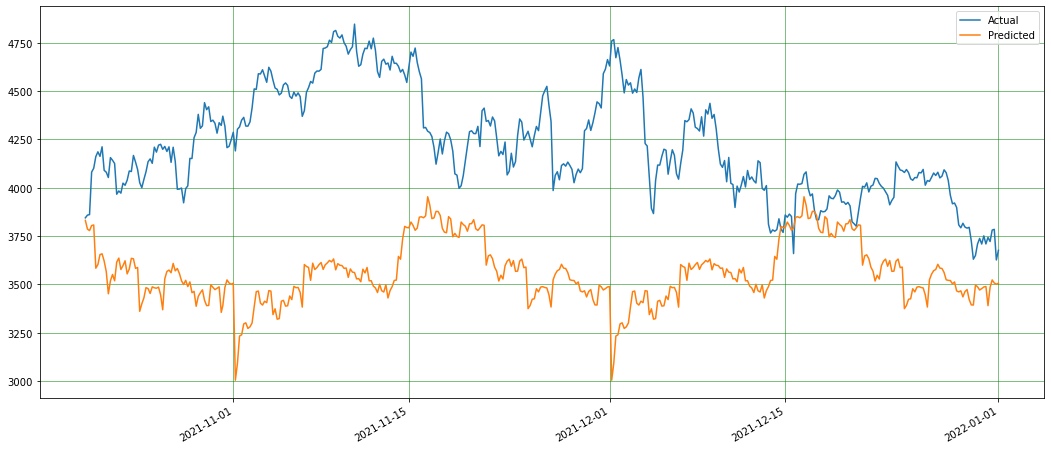

In [69]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Comparison of all algorithms Results on MSE score

In [70]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MSE score"] # for  column names 

x.add_row(["ARIMA Algorithm", round(test_mse1,3)]) # for the results of mse 
x.add_row(["SARIMAX Algorithm", round(test_mse2,3)]) # for the results of mse 
x.add_row(["MLP Algorithm", round(test_mse3,3)]) # for the results of mse 
x.add_row(["Ridge Algorithm", round(test_mse7,3)]) # for the results of mse 
x.add_row(["Random Forest Algorithm", round(test_mse8,3)]) # for the results of mse 
x.add_row(["XGB Algorithm", round(test_mse9,3)]) # for the results of mse 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | MSE score  |
+-------------------------+------------+
|     ARIMA Algorithm     | 189295.501 |
|    SARIMAX Algorithm    | 147533.404 |
|      MLP Algorithm      | 378834.816 |
|     Ridge Algorithm     | 340107.333 |
| Random Forest Algorithm | 790452.495 |
|      XGB Algorithm      | 558201.908 |
+-------------------------+------------+




# Comparison of all algorithms Results on MAE score

In [71]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAE score"] # for  column names 


x.add_row(["ARIMA Algorithm", round(test_MAE1,3)]) # for the results of MAE 
x.add_row(["SARIMAX Algorithm", round(test_MAE2,3)]) # for the results of MAE 
x.add_row(["MLP Algorithm", round(test_MAE3,3)]) # for the results of MAE 
x.add_row(["Ridge Algorithm", round(test_MAE7,3)]) # for the results of MAE  
x.add_row(["Random Forest Algorithm", round(test_MAE8,3)]) # for the results of MAE 
x.add_row(["XGB Algorithm", round(test_MAE9,3)]) # for the results of MAE 
print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MAE score |
+-------------------------+-----------+
|     ARIMA Algorithm     |  356.988  |
|    SARIMAX Algorithm    |  317.056  |
|      MLP Algorithm      |  521.059  |
|     Ridge Algorithm     |  487.762  |
| Random Forest Algorithm |  851.524  |
|      XGB Algorithm      |  662.919  |
+-------------------------+-----------+




# Comparison of all algorithms Results on RMSE score

In [72]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "RMSE score"] # for  column names 

x.add_row(["ARIMA Algorithm", round(test_rmse1,3)]) # for the results of rmse 
x.add_row(["SARIMAX Algorithm", round(test_rmse2,3)]) # for the results of rmse 
x.add_row(["MLP Algorithm", round(test_rmse3,3)]) # for the results of rmse 
x.add_row(["Ridge Algorithm", round(test_rmse7,3)]) # for the results of rmse 
x.add_row(["Random Forest Algorithm", round(test_rmse8,3)]) # for the results of rmse 
x.add_row(["XGB Algorithm", round(test_rmse9,3)]) # for the results of rmse 



print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | RMSE score |
+-------------------------+------------+
|     ARIMA Algorithm     |  435.081   |
|    SARIMAX Algorithm    |  384.101   |
|      MLP Algorithm      |  615.496   |
|     Ridge Algorithm     |  583.187   |
| Random Forest Algorithm |  889.074   |
|      XGB Algorithm      |  747.129   |
+-------------------------+------------+




# Comparison of all algorithms Results on MAPE score

In [73]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAPE score"] # for  column names 

x.add_row(["ARIMA Algorithm", round(test_mape1,3)]) # for the results of mape 
x.add_row(["SARIMAX Algorithm", round(test_mape2,3)]) # for the results of mape 
x.add_row(["MLP Algorithm", round(test_mape3,3)]) # for the results of mape 
x.add_row(["Ridge Algorithm", round(test_mape7,3)]) # for the results of mape 
x.add_row(["Random Forest Algorithm", round(test_mape8,3)]) # for the results of mape 
x.add_row(["XGB Algorithm", round(test_mape9,3)]) # for the results of mape 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | MAPE score |
+-------------------------+------------+
|     ARIMA Algorithm     |   0.081    |
|    SARIMAX Algorithm    |   0.073    |
|      MLP Algorithm      |    0.12    |
|     Ridge Algorithm     |   0.112    |
| Random Forest Algorithm |   0.199    |
|      XGB Algorithm      |   0.153    |
+-------------------------+------------+


